<a href="https://colab.research.google.com/github/benedictdebrah/DL-studies/blob/main/Deep_learning_training_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Personal notebook for ANN
---
In this notebook, after learning the theorotical approoach of ANN , I try implementing them with some simple example to deepen my understanding and get the basics of tensorflow



In [1]:
#insatlling tensorflow
!pip install tensorflow

In [2]:
#checking version
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#calling data
data = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#dividing dataset into dependent and independent features
X = data.iloc[:,3:13]


In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
#independent features
y = data.iloc[:,13]

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Feature engineering

In [10]:
#fixing the data since we have some categorical features (performing encoding)
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
gender = pd.get_dummies(X['Gender'],drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
#deleting the changed columns
X= X.drop(['Geography','Gender'],axis= 1)

In [13]:
X = pd.concat([X,geography,gender],axis=1)

## Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [18]:
X_train.shape

(8000, 11)

## Creating ANN


[Blog about ANN](https://www.analyticsvidhya.com/blog/2021/09/introduction-to-artificial-neural-networks/)



In [19]:
from tensorflow.keras.models import Sequential                          #do forward and backward prop
from tensorflow.keras.layers import Dense                               #create neurons
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU          #for activation
from tensorflow.keras.layers import Dropout                                #checks overfitting



In [20]:
# lets innitialize ANN
classifier = Sequential()


In [21]:
#adding the input layer
classifier.add(Dense(units = 11,activation ='relu'))

In [22]:
#adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [23]:
#adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [24]:
##ading the output layer
classifier.add(Dense(1,activation ='sigmoid'))

Train Neural network

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5,verbose = 1)

# Compile the classifier model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping callback
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks = early_stop)

print("***********************************")

# Evaluate the model
loss, accuracy = classifier.evaluate(X_test, y_test)


Epoch 1/100
536/536 [==============================] - 7s 7ms/step - loss: 0.5292 - accuracy: 0.7391 - val_loss: 0.4648 - val_accuracy: 0.7921
Epoch 2/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4331 - accuracy: 0.8184 - val_loss: 0.4309 - val_accuracy: 0.8254
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4050 - accuracy: 0.8367 - val_loss: 0.4142 - val_accuracy: 0.8319
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3827 - accuracy: 0.8462 - val_loss: 0.3934 - val_accuracy: 0.8425
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3621 - accuracy: 0.8515 - val_loss: 0.3802 - val_accuracy: 0.8436
Epoch 6/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3485 - accuracy: 0.8580 - val_loss: 0.3714 - val_accuracy: 0.8527
Epoch 7/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3412 - accuracy: 0.8606 - val_loss: 0.3655 - val_accuracy: 0.8538

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

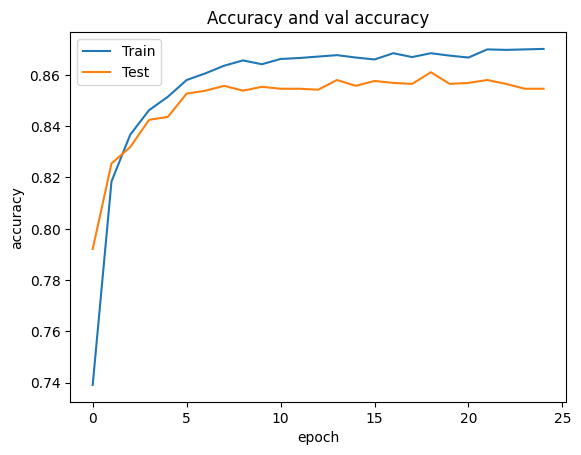

In [27]:
#plot what happened
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy and val accuracy')
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

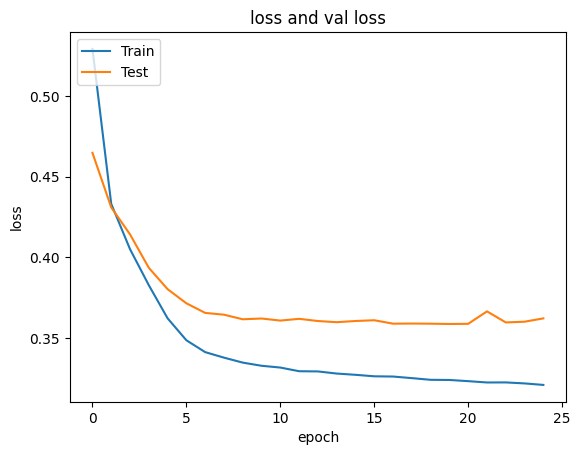

In [28]:
#plot loss and val loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss and val loss')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [29]:
classifier.get_weights()

[array([[-0.0542036 , -0.34055096, -0.11047392, -0.02850039, -0.06972937,
         -0.29349196,  0.00339226, -0.569015  , -0.01270904,  0.14440432,
         -0.01227008],
        [ 0.13670145, -0.54092336, -0.6578773 , -0.70396876,  0.00673756,
          0.90474397,  0.19809116, -0.5070504 , -0.68986136, -0.6427998 ,
         -0.8409954 ],
        [-0.02655957,  0.02078177, -0.04063219, -0.03950215,  0.00329054,
          0.05981745, -0.09631151, -0.2567854 , -0.23600845,  0.30667338,
         -0.12513882],
        [ 0.41102418, -0.303219  ,  0.05069309,  0.08292312, -0.1838166 ,
         -0.19998717, -0.01163145, -0.35055017, -0.23919807,  0.11719245,
         -0.11092459],
        [ 0.9537393 , -0.02202294, -0.17140834, -0.23076375, -1.0626961 ,
         -0.12253562,  0.05251838,  0.02585175,  0.05672013,  0.11594304,
          0.18759447],
        [-0.11896057, -0.7504263 ,  0.26767963, -0.4145817 , -0.09563139,
         -0.3028696 , -0.2611739 ,  0.2710021 ,  0.15379067, -0.1076285

# Prediction


In [30]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)  # the threshold is 0.5

# Convert predictions and true labels to binary format (0s and 1s)
y_pred = y_pred.astype(int)
y_test_binary = y_test.astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


63/63 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1517   90]
 [ 195  198]]
